# M√©todo de Euler: Flujo de Poiseuille

**Objetivo general**
- Realizar el seguimiento de un conjunto de part√≠culas dentro de un flujo usando el M√©todo de Euler hacia adelante.

**Objetivos particulares**
- Entender en qu√© consiste el flujo de Poiseuille.
- Calcular la trayectoria de una part√≠cula.
- Calcular la trayectoria de varias part√≠culas.
- Expresar el problema en t√©rminos de un Problema de Valor Inicial.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

## Contenido
- [1. Flujo en una tuber√≠a.](#1)
- [2. C√°lculo de una sola trayectoria.](#2)
    - [2.1 Definici√≥n y graficaci√≥n del flujo. ](#2-1)
    - [2.2 Definici√≥n de la posici√≥n inicial de la part√≠cula y graficaci√≥n. ](#2-2)
    - [2.3 Seguimiento de la part√≠cula y graficaci√≥n de la trayectoria. ](#2-3)
        - [Ejercicio 1. Implementaci√≥n del M√©todo de Euler en 2D.](#ej-1)
        - [Ejercicio 2. Implementaci√≥n del M√©todo de Euler para varios pasos de tiempo.](#ej-2)
- [3. C√°lculo de varias trayectorias.](#3)
    - [3.1 Definici√≥n las posiciones iniciales. ](#3-1)
    - [3.2 Seguimiento de todas las part√≠culas. ](#3-2)
        - [Ejercicio 3. Implementaci√≥n del M√©todo de Euler para varias part√≠culas.](#ej-3)
        - [Ejercicio 4. Interactivo.](#ej-4)
- [4. Problemas de valor inicial.](#4)
- [5. Deducci√≥n de M√©todo de Euler (OPCIONAL).](#5)

In [1]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import macti.visual as mvis
from macti.evaluation import *

<a name='1'></a>
## Flujo en una tuber√≠a.
De acuerdo con la <a href="https://es.wikipedia.org/wiki/Ley_de_Poiseuille#C%C3%A1lculo_de_la_f%C3%B3rmula">Ley de Poiseuille</a> la velocidad de un l√≠quido incompresible y uniformemente viscoso (<a href="https://es.wikipedia.org/wiki/Fluido_newtoniano">fluido newtoniano</a>) a trav√©s de un tubo cil√≠ndrico de secci√≥n circular constante se puede calcular mediante la siguiente f√≥rmula

$$
u(r) =\left( \dfrac{\Delta p}{4 L \mu} \right)(R^2 - r^2) \tag{1}
$$

donde $\mu$ es la viscosidad din√°mica del fluido, $\Delta p$ representa la diferencia de presi√≥n entre dos puntos a lo largo del eje del cilindro, $L$ y $R$ representan la longitud y el radio del cilindro respectivamente. La ecuaci√≥n $(1)$ define a la velocidad $u$ como una funci√≥n de $r$, y esta √∫ltima es una variable que se mide desde desde el eje del cilindro en el intervalo $[0,R]$, v√©ase la siguiente figura:

<a title="Af3 at the Spanish language Wikipedia, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Poiseuille.png"><img width="300" alt="Poiseuille" src="https://upload.wikimedia.org/wikipedia/commons/4/46/Poiseuille.png"></a>     

### Graficaci√≥n de la velocidad del flujo.

Todo el procedimiento lo haremos paso a paso (Pensamiento Computacional).

Observamos que la f√≥rmula $(1)$ representa una par√°bola.

1. **Primero definimos la f√≥rmula en una funci√≥n.**

In [2]:
u = lambda r: ŒîP*(R**2 - r**2)/(4*L*Œº)  # Flujo de Poiseuille

2. **Definimos algunos datos para la f√≥rmula.**

In [3]:
ŒîP = 0.298  # Diferencia de presiones
Œº = 1.05e-3 # Viscosidad del flujo
L = 3.0     # Longitud del tubo
R = 0.5     # Radio del tubo
print('Diferencia de presiones: {} \nViscosidad: {} \nLongitud: {} \nRadio: {}'.format(ŒîP,Œº,L,R))

Diferencia de presiones: 0.298 
Viscosidad: 0.00105 
Longitud: 3.0 
Radio: 0.5


3. **Evaluamos y graficamos la f√≥rmula.**

**Nota**: En la figura de arriba observamos que la $r$ var√≠a en la direcci√≥n $y$ de los ejes Cartesianos.

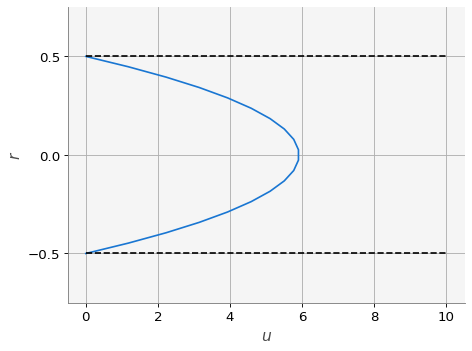

In [7]:
# Definici√≥n de r
r = np.linspace(-R,R,20)

# Evaluaci√≥n y graficaci√≥n de u(r)
plt.plot(u(r), r)

# Configuraci√≥n de la gr√°fica
plt.xlabel('$u$')
plt.ylabel('$r$')
plt.yticks([-R,0,R])
plt.ylim(-1.5*R,1.5*R)
plt.hlines([-R,R], xmin=0, xmax=10, lw=1.5, ls = '--', color='k')
plt.grid()
plt.show()

4. **Dibujar la velocidad en todo el tubo.**

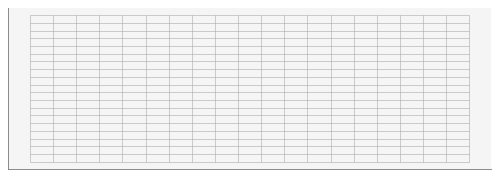

In [15]:
# Primero definimos las coordenadas en el eje x.
x = np.linspace(0, L, 20)

# Ahora definimos una malla en todo el tubo.
xg, yg = np.meshgrid(x, r, indexing='ij', sparse=False)

# Graficamos la malla.
axis_par = [dict(aspect='equal')]
vis = mvis.Plotter(1,1, axis_par)
vis.plot_mesh2D(1, xg, yg)

5. **Definici√≥n de la velocidad en la malla.**

Dado que el dominio es bidimensional, la velocidad estar√° definida de la siguiente manera $\vec{V}(x,r) = \big( u(x,r), v(x,r) \big)$ donde:

$$
\begin{eqnarray}
u(x, r) & = & \left( \dfrac{\Delta p}{4 L \mu} \right)(R^2 - r^2) \\
v(x, r) & = & 0
\end{eqnarray}
$$


La implementaci√≥n de la velocidad es como sigue:

In [16]:
u = lambda x, r: ŒîP*(R**2 - r**2)/(4*L*Œº)  # Flujo de Poiseuille
v = lambda x, r: r*0                       # La velocidad en direcci√≥n vertical es cero.

En el c√≥digo anterior hemos usado funciones `lambda` de Python. Observe que las funciones `lambda` definidas en la celda anterior, reciben los par√°metros `x` y `r`, de esta manera se eval√∫an `u` y `v` sobre toda la malla.

La gr√°fica del flujo en todo el tubo es la siguiente:

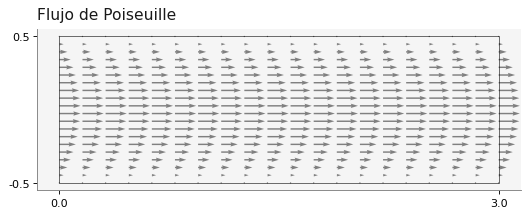

In [35]:
# Graficamos el flujo.
axis_par = [dict(aspect='equal')]
vis = mvis.Plotter(1,1, axis_par)
vis.quiver(1, xg, yg, u(xg, yg), v(xg,yg), color='gray')
vis.plot_frame(1, xg, yg)
plt.title('Flujo de Poiseuille')
plt.show()

vis.s

<a name='2'></a>
## C√°lculo de una sola trayectoria.

Supongamos que soltamos una part√≠cula en el punto $(x_i, y_i)$ dentro del cil√≠ndro del flujo de Poiseuille descrito arriba. **¬øHac√≠a donde se mover√° esa part√≠cula?**

Hagamos el siguiente an√°lisis:

1. Sabemos que la velocidad de la part√≠cula se puede calcular con la f√≥rmula simple $u_p = \dfrac{\delta x}{\delta t}$, donde $\delta x$ es la distancia que recorre la part√≠cula en el tiempo $\delta t$.

2. De aqu√≠ sabemos que la distancia es $\delta x = \delta t * u_p$.

3. Si la part√≠cula se encuentra inicialmente en $x_i$ y al final del tiempo llega al punto $x_f$ entonces la distancia recorrida ser√° $\delta x = x_f - x_i$. 

4. Por lo tanto, combinando las f√≥rmulas de 2. y 3., es f√°cil ver que el punto $x_f$ se obtiene con la siguiente f√≥rmula:

$$
x_f = x_i +  \delta t * u_p \tag{2}
$$

La ecuaci√≥n $(2)$ representa el **M√©todo de Euler** (hacia adelante) para aproximar la soluci√≥n de una Ecuaci√≥n Diferencial Ordinaria de primer orden.

Antes de revisar los detalles de este m√©todo veamos como podemos calcular las trayectorias de algunas part√≠culas y dibujarlas dentro del flujo.

Resolveremos el problema paso a paso. Primero para una part√≠cula haremos lo siguiente:

1. Definici√≥n del flujo y graficaci√≥n del flujo.
2. Definici√≥n de la posici√≥n inicial de la part√≠cula y graficaci√≥n.
3. Seguimiento de la part√≠cula y graficaci√≥n de la trayectoria.

<a name='2-1'></a>
### Definici√≥n y graficaci√≥n del flujo.

Este punto lo hicimos antes, aqu√≠ solo repetimos los pasos realizados

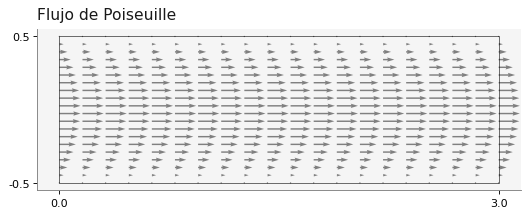

In [34]:
# Coordenadas Cartesianas
x = np.linspace(0,L,20)
r = np.linspace(-R,R,20)
xg, yg = np.meshgrid(x, r, indexing='ij', sparse=False)

# Campo de velocidad
u = lambda x,r: ŒîP*(R**2 - r**2)/(4*L*Œº)  # Flujo de Poiseuille
v = lambda x,r: r*0                       # La velocidad en direcci√≥n y es cero.

# Graficamos el flujo.
axis_par = [dict(aspect='equal')]
vis = mvis.Plotter(1,1, axis_par)
vis.quiver(1, xg, yg, u(xg, yg), v(xg,yg), color='gray')
vis.plot_frame(1, xg, yg)
plt.title('Flujo de Poiseuille')
plt.show()

<a name='2-2'></a>
### Definici√≥n de la posici√≥n inicial de la part√≠cula y graficaci√≥n.

La posici√≥n inicial de la part√≠cula debe estar dentro del dominio de estudio, es decir dentro de $[0,L] \times [-R, R]$.

In [25]:
# Posici√≥n inicial de la part√≠cula
xi = 0.1 
yi = 0.0

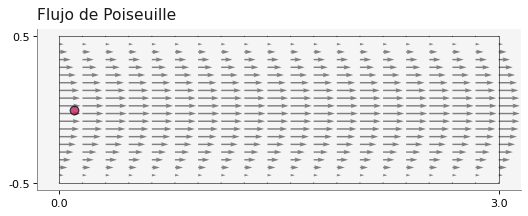

In [33]:
axis_par = [dict(aspect='equal')]
vis = mvis.Plotter(1,1, axis_par)

# Graficaci√≥n de la posici√≥n inicial de la part√≠cula
vis.scatter(1, xi, yi, fc='C3', ec='k', alpha=0.75, s=60, zorder=5)

# Graficamos el flujo.
vis.quiver(1, xg, yg, u(xg, yg), v(xg,yg), color='gray')
vis.plot_frame(1, xg, yg)
plt.title('Flujo de Poiseuille')
plt.show()

<a name='2-3'></a>
### Seguimiento de la part√≠cula y graficaci√≥n de la trayectoria.

A partir de la f√≥rmula $(2)$, que es el m√©todo de Euler, podemos calcular la siguiente posici√≥n de la part√≠cula aplicando dicha f√≥rmula a cada coordenada:

$$
\begin{eqnarray}
x_f & = & x_i + \delta t * u_p  \tag{3}\\
y_f & = & y_i + \delta t * v_p \\
\end{eqnarray}
$$

<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 1. Implementaci√≥n del M√©todo de Euler en 2D.</font>**

<font color="DarkBlue">Para la posici√≥n inicial $(x_i, y_i) = (0.1,0.0)$ y $t = 0.05$ calcule la posici√≥n final $(x_f, y_f)$ mediante las f√≥rmulas dadas en $(3)$.</font>

In [27]:
# Paso de tiempo
ùõøùë° = 0.05

# C√°lculo de la nueva posici√≥n usando el m√©todo de Euler
### BEGIN SOLUTION
xf = xi + ùõøùë° * u(xi, yi)
yf = yi + ùõøùë° * v(xi, yi)
### END SOLUTION

print('Posici√≥n inicial ({}, {})'.format(xi, yi))
print('Posici√≥n final ({},{})'.format(xf, yf))

Posici√≥n inicial (0.1, 0.0)
Posici√≥n final (0.3956349206349207,0.0)


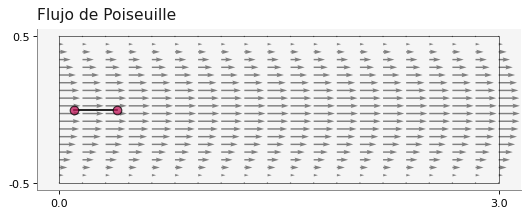

In [32]:
axis_par = [dict(aspect='equal')]
vis = mvis.Plotter(1,1, axis_par)

# Graficaci√≥n del punto inicial y del punto final.
vis.scatter(1, [xi,xf], [yi, yf], fc='C3', ec='k', alpha=0.75, s=60, zorder=5)

# Graficaci√≥n de la trayectoria.
vis.plot(1, [xi,xf], [yi, yf], color='k')

# Graficamos el flujo.
vis.quiver(1, xg, yg, u(xg, yg), v(xg,yg), color='gray')
vis.plot_frame(1, xg, yg)
plt.title('Flujo de Poiseuille')
plt.show()

En el c√°lculo anterior, se realiz√≥ el seguimiento durante **un solo paso de tiempo** y definimos el paso de tiempo igual a $0.05$. 

Para calcular varios pasos de tiempo debemos definir lo siguiente:

1. El n√∫mero de pasos que deseamos calcular $N_t$.
2. Definir un arreglo para almacenar las coordenadas de la trayectoria en cada paso.
3. Realizar un ciclo de c√°lculo que permita ir calculando la trayectoria con el m√©todo de Euler.

El siguiente algoritmo describe los pasos a realizar:
<center>
<img src="../utils/figs/algTrayectoria01.png"  width='400px'/>
</center>

En el algoritmo anterior estamos usando $h_t$ como paso de tiempo en vez de $t$.

<a name='ej-2'></a>
#### **<font color="DodgerBlue">Ejercicio 2. Implementaci√≥n del M√©todo de Euler para varios pasos de tiempo.</font>**

<font color="DarkBlue">Tomando en cuenta el algoritmo 1, complete el c√≥digo que sigue agregando las f√≥rmulas correspondientes al M√©todo de Euler para cada coordenada.</font>

In [36]:
# N√∫mero de pasos de tiempo.
Nt = 5  
ht = 0.05

# Posici√≥n inicial de la part√≠cula
xi = 0.1  
yi = 0.0

# Definimos el arreglo para almacenar las posiciones
c = np.zeros((Nt, 2))
c[0] = (xi, yi)

for n in range(1, Nt): # Ciclo para calcular las posiciones
    ### BEGIN SOLUTION
    xf = xi + ht * u(xi,yi) # F√≥rmula de Euler para x
    yf = yi + ht * v(xi,yi) # F√≥rmula de Euler para y
    ### END SOLUTION
    c[n] = (xf, yf)         # Agregamos (xf, yf) a la lista de posiciones
    (xi, yi) = (xf, yf)     # Actualizamos (xi, yi)
    
print('Posiciones de la trayectoria\n {}'.format(c))

Posiciones de la trayectoria
 [[0.1        0.        ]
 [0.39563492 0.        ]
 [0.69126984 0.        ]
 [0.98690476 0.        ]
 [1.28253968 0.        ]]


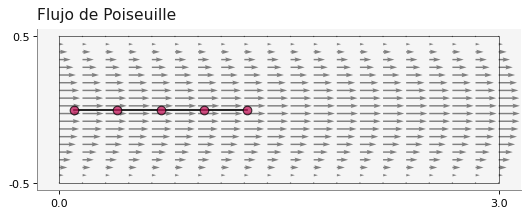

In [37]:
axis_par = [dict(aspect='equal')]
vis = mvis.Plotter(1,1, axis_par)

# Graficaci√≥n del punto inicial.
vis.scatter(1, c[:,0], c[:,1], fc='C3', ec='k', alpha=0.75, s=60, zorder=5)

# Graficaci√≥n de la trayectoria.
vis.plot(1, c[:,0], c[:,1], color='k')

# Graficamos el flujo.
vis.quiver(1, xg, yg, u(xg, yg), v(xg,yg), color='gray')
vis.plot_frame(1, xg, yg)
plt.title('Flujo de Poiseuille')
plt.show()

<a name='3'></a>
## C√°lculo de varias trayectorias.

Para calcular varias trayectorias haremos lo siguiente.

<a name='3-1'></a>
### Definici√≥n de las posiciones iniciales.

Primero se deben definir las posiciones iniciales de $N_p$ part√≠culas y graficarlas:

In [38]:
# N√∫mero de part√≠culas
Np = 7

# Coordenadas iniciales de las part√≠culas
px = np.zeros(Np)
py = np.linspace(-0.4, 0.4, Np) # Equiespaciadas en direcci√≥n y

print('Posiciones iniciales \n px = {} \n py = {}'.format(px, py))

Posiciones iniciales 
 px = [0. 0. 0. 0. 0. 0. 0.] 
 py = [-0.4        -0.26666667 -0.13333333  0.          0.13333333  0.26666667
  0.4       ]


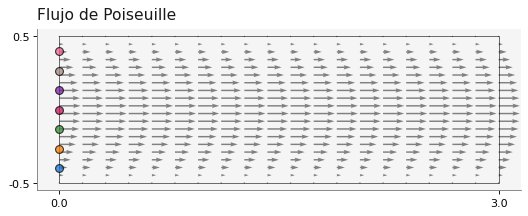

In [39]:
axis_par = [dict(aspect='equal')]
vis = mvis.Plotter(1,1, axis_par)

# Graficaci√≥n de las posiciones iniciales
for i in range(Np):
    vis.scatter(1, px[i], py[i], ec='k', alpha=0.75, s=50, zorder=5)

# Graficamos el flujo.
vis.quiver(1, xg, yg, u(xg, yg), v(xg,yg), color='gray')
vis.plot_frame(1, xg, yg)
plt.title('Flujo de Poiseuille')
plt.show()

<a name='3-2'></a>
### Seguimiento de todas las part√≠culas.

Ahora realizamos el seguimiento de cada part√≠cula y dibujamos su trayectoria usando el siguiente algoritmo:
<center>
<img src="../utils/figs/algTrayectoria02.png"  width='400px'/>
</center>

<a name='ej-3'></a>
#### **<font color="DodgerBlue">Ejercicio 3. Implementaci√≥n del M√©todo de Euler para varias part√≠culas.</font>**

<font color="DarkBlue">Tomando en cuenta el algoritmo 2, complete el c√≥digo siguiente para calcular las trayectorias de $7$ part√≠culas usando como posiciones iniciales los arreglos `px = [0. 0. 0. 0. 0. 0. 0.]` y `py = [-0.4 -0.26666667 -0.13333333 0. 0.13333333 0.26666667 0.4]` calculados anteriormente. Use tambi√©n los valores `Nt = 10` y `ht = 0.05`.</font>

In [40]:
Nt = 10
ht = 0.05
t = np.zeros((Np, Nt,2))

for j in range(0, Np):
    t[j, 0, :] = (px[j], py[j]) 

for j in range(0,Np):
    (xi, yi) = t[j, 0, :] # Posici√≥n inicial de la trayectoria j
    for n in range(1, Nt): # Ciclo para calcular las posiciones
        ### BEGIN SOLUTION
        xf = xi + ht * u(xi,yi) # F√≥rmula de Euler para x
        yf = yi + ht * v(xi,yi) # F√≥rmula de Euler para y
        t[j, n, :] = (xf, yf)   # Agregamos (xf, yf) a la lista de posiciones
        (xi, yi) = (xf, yf)     # Actualizamos (xi, yi)
        ### END SOLUTION
print(' N√∫mero de pasos: {} \n Paso de tiempo: {} \n N√∫mero de part√≠culas: {}'.format(Nt, ht, Np))

 N√∫mero de pasos: 10 
 Paso de tiempo: 0.05 
 N√∫mero de part√≠culas: 7


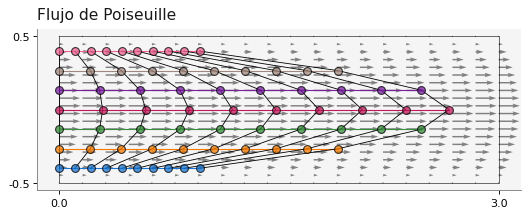

In [42]:
axis_par = [dict(aspect='equal')]
vis = mvis.Plotter(1,1, axis_par)

# Graficaci√≥n de todas las trayectorias y del flujo
for j in range(Np):
    vis.scatter(1, t[j,:,0], t[j,:,1],  ec='k', s=50, alpha=0.75, zorder=5)
    vis.plot(1, t[j,:,0], t[j,:,1], lw=1.0)

# Graficaci√≥n del frente del flujo.
vis.plot(1, t[:,:,0], t[:,:,1], color='k', lw=0.75)

# Graficamos el flujo.
vis.quiver(1, xg, yg, u(xg, yg), v(xg,yg), color='gray')
vis.plot_frame(1, xg, yg)
plt.title('Flujo de Poiseuille')
plt.show()

<a name='ej-4'></a>
#### **<font color="DodgerBlue">Ejercicio 4. Interactivo.</font>**

- <font color="DarkBlue">Ejecute la siguiente celda para obtener un simulador en donde puede variar algunos par√°metros para graficar un flujo y las trayectorias de varias part√≠culas.</font>
- <font color="DarkBlue">Revise la secci√≥n [Problemas de valor inicial.](#4) y posteriormente realice abra el cuaderno <a href="DecaimientoRadioactivo.ipynb">DecaimientoRadioactivo.ipynb</a> y realice los ejercicios que ah√≠ se piden.</font> 
- <font color="DarkBlue">Posteriormente responda las preguntas en el *quiz* **M√©todo de Euler para la soluci√≥n de un PVI** en Moodle.</font> 


In [45]:
%run "./zFlujo_interactive.ipynb"

interactive(children=(IntSlider(value=20, description='Nt', max=50, min=10, step=5), FloatSlider(value=0.02, d‚Ä¶